WEEKLY TASK


In [149]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
data =pd.read_csv("/content/student-mat.csv")

In [132]:
data.shape

(395, 23)

In [134]:
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,schoolsup,famsup,paid,activities,internet,freetime,goout,health,absences,G3
0,0,18,1,0,0,4,4,0,4,1,...,1,0,0,0,0,3,4,3,6,6
1,0,17,1,0,1,1,1,0,2,0,...,0,1,0,0,1,3,3,3,4,6
2,0,15,1,1,1,1,1,0,2,1,...,1,0,1,0,1,3,2,3,10,10
3,0,15,1,0,1,4,2,1,3,1,...,0,1,1,1,1,2,2,5,2,15
4,0,16,1,0,1,3,3,2,2,0,...,0,1,1,0,0,3,2,5,4,10


In [135]:
data.tail()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,schoolsup,famsup,paid,activities,internet,freetime,goout,health,absences,G3
390,1,20,1,1,0,2,2,3,3,2,...,0,1,1,0,0,5,4,4,11,9
391,1,17,1,1,1,3,1,3,3,1,...,0,0,0,0,1,4,5,2,3,16
392,1,21,0,0,1,1,1,2,2,2,...,0,0,0,0,0,5,3,3,3,7
393,1,18,0,1,1,3,2,3,2,1,...,0,0,0,0,1,4,1,5,0,10
394,1,19,1,1,1,1,1,2,0,0,...,0,0,0,0,1,2,3,5,5,9


In [136]:
data.describe()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,schoolsup,famsup,paid,activities,internet,freetime,goout,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,0.853165,...,0.129114,0.612658,0.458228,0.508861,0.832911,3.235443,3.108861,3.554430,5.708861,10.415190
std,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,0.536684,...,0.335751,0.487761,0.498884,0.500555,0.373528,0.998862,1.113278,1.390303,8.003096,4.581443
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,3.000000,0.000000,8.000000
50%,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,11.000000
75%,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,5.000000,8.000000,14.000000
max,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [137]:
data.columns #number of parameters

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'internet', 'freetime', 'goout',
       'health', 'absences', 'G3'],
      dtype='object')

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   age         395 non-null    int64
 2   address     395 non-null    int64
 3   famsize     395 non-null    int64
 4   Pstatus     395 non-null    int64
 5   Medu        395 non-null    int64
 6   Fedu        395 non-null    int64
 7   Mjob        395 non-null    int64
 8   Fjob        395 non-null    int64
 9   guardian    395 non-null    int64
 10  traveltime  395 non-null    int64
 11  studytime   395 non-null    int64
 12  failures    395 non-null    int64
 13  schoolsup   395 non-null    int64
 14  famsup      395 non-null    int64
 15  paid        395 non-null    int64
 16  activities  395 non-null    int64
 17  internet    395 non-null    int64
 18  freetime    395 non-null    int64
 19  goout       395 non-null    int64
 20  health      395 non-null    int6

In [139]:
len(data) #total number of students

395

In [140]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [141]:
data['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

In [142]:
data.loc[data['G3'] < 10]

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,schoolsup,famsup,paid,activities,internet,freetime,goout,health,absences,G3
0,0,18,1,0,0,4,4,0,4,1,...,1,0,0,0,0,3,4,3,6,6
1,0,17,1,0,1,1,1,0,2,0,...,0,1,0,0,1,3,3,3,4,6
7,0,17,1,0,0,4,4,2,4,1,...,1,1,0,0,0,1,4,1,6,6
10,0,15,1,0,1,4,4,4,1,1,...,0,1,1,0,1,3,3,2,0,9
18,1,17,1,0,1,3,2,3,3,1,...,0,1,0,1,1,5,5,5,16,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0,18,1,1,1,3,1,4,3,1,...,0,1,1,0,1,3,4,1,0,8
389,0,18,1,0,1,1,1,2,2,1,...,0,0,0,1,0,1,1,5,0,0
390,1,20,1,1,0,2,2,3,3,2,...,0,1,1,0,0,5,4,4,11,9
392,1,21,0,0,1,1,1,2,2,2,...,0,0,0,0,0,5,3,3,3,7


In [143]:
data.isnull().sum()

sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
freetime      0
goout         0
health        0
absences      0
G3            0
dtype: int64

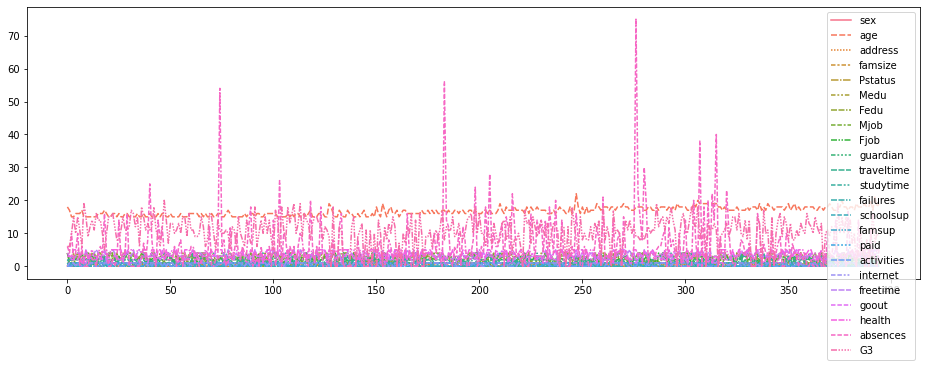

In [144]:
plt.figure(figsize=(16,5))
sns.lineplot(data=data)

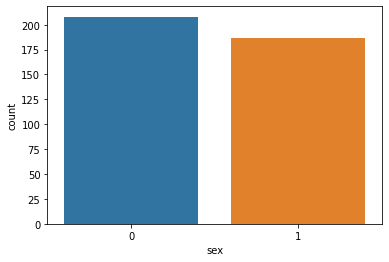

In [145]:
sns.countplot(x='sex',data=data)# counting the number of students in each sex

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



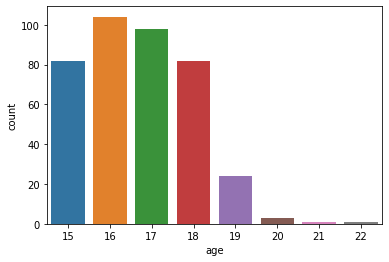

In [146]:
sns.countplot(data.age) # counting the number of students in each age

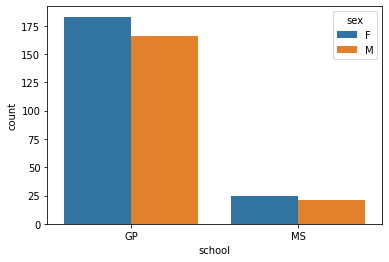

In [150]:
sns.countplot(x="school", hue ="sex", data=data)# count the number of students in each school

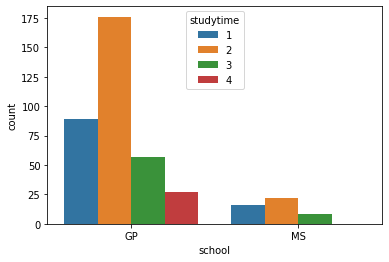

In [152]:
sns.countplot(x="school", hue ="studytime", data=data)

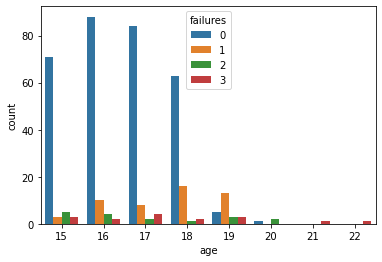

In [153]:
sns.countplot(x="age", hue="failures", data=data) # counting the number of students in each age who have failed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



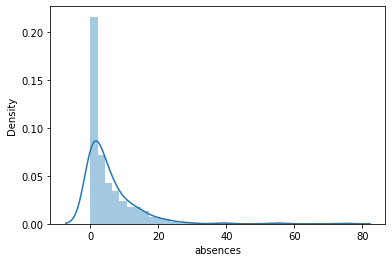

In [154]:
sns.distplot(data.absences)

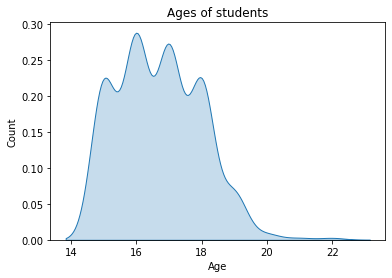

In [155]:
b = sns.kdeplot(data['age'],shade=True) # plotting the distribution of age of students in the school
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

LABEL ENCODING

In [156]:
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])
data.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [157]:
data.corr()['G3'].sort_values() # print the correlation of G3 with other parameters 

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
Fjob          0.042286
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
Mjob          0.102082
sex           0.103456
address       0.105756
reason        0.121994
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [158]:
data = data.drop(['school', 'G1', 'G2','romantic','Dalc','Walc','famrel','nursery','reason','higher'], axis='columns')# drop the columns which are not required

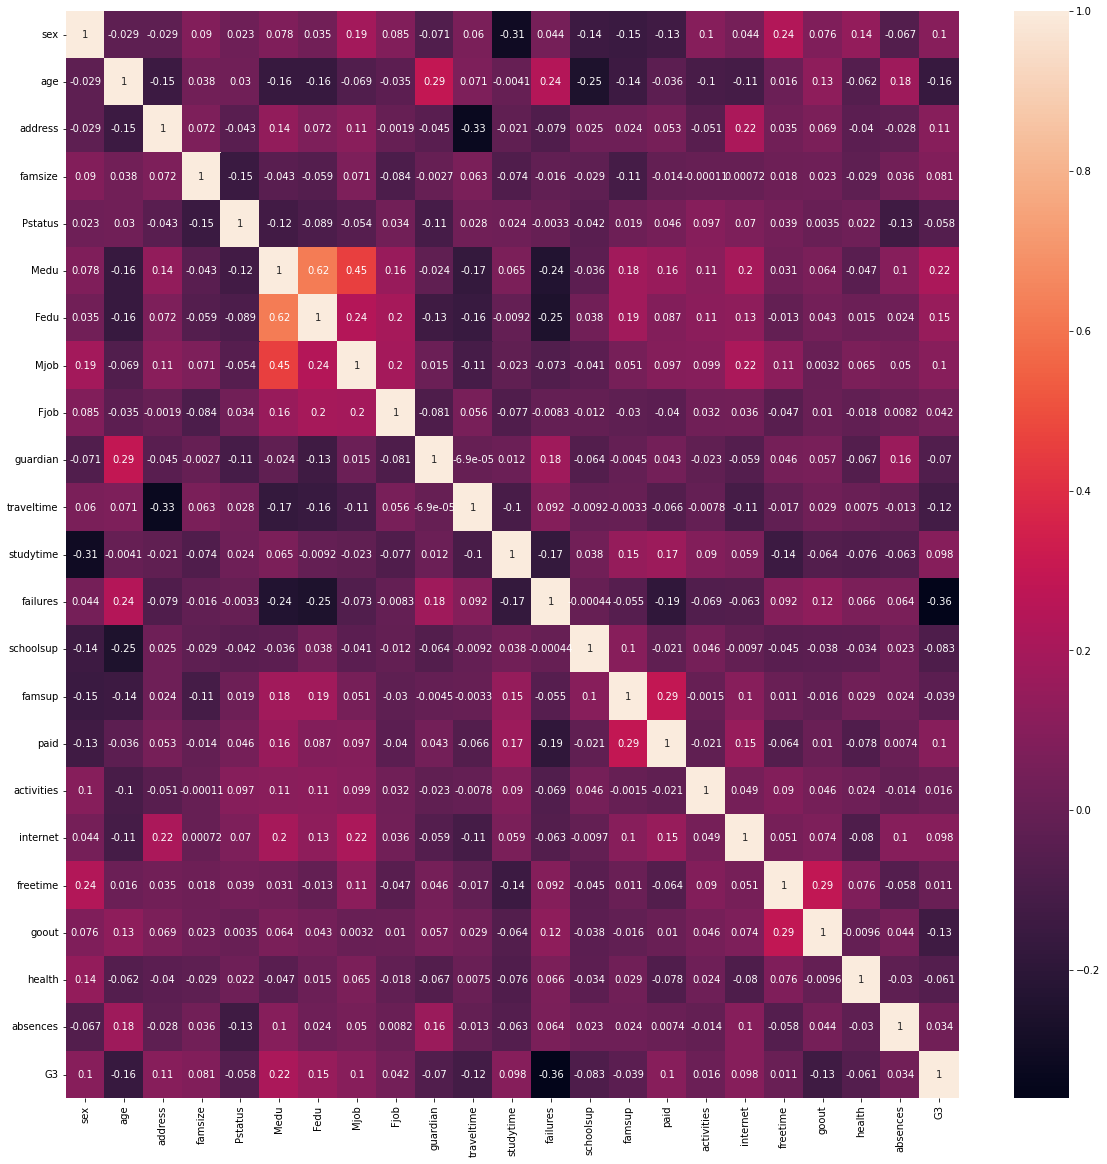

In [159]:
plt.figure(figsize=(20,20))
dataplot=sns.heatmap(data.corr(),annot=True)
plt.show()

In [160]:
most_correlated = data.corr().abs()['G3'].sort_values(ascending=False)
most_correlated = most_correlated[:9]# select the top 9 parameters
most_correlated

G3            1.000000
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
address       0.105756
sex           0.103456
Name: G3, dtype: float64

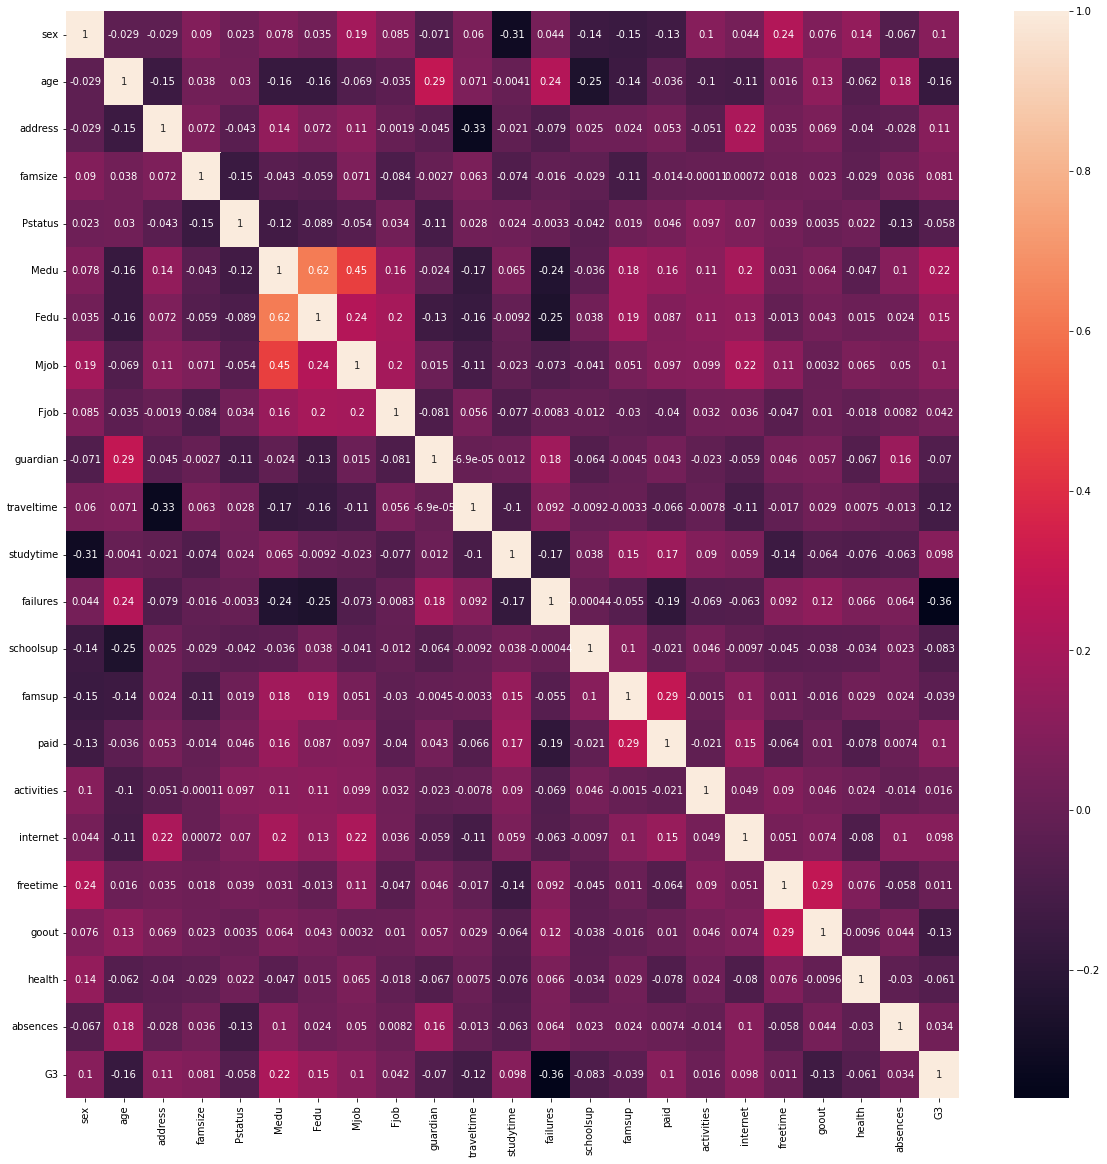

In [161]:
plt.figure(figsize=(20,20))
dataplot=sns.heatmap(data.corr(),annot=True)
plt.show()

In [162]:
import plotly.express as px
fig = px.scatter(data, x='failures',y='G3', color="age")
fig.show()

PREDICTION

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data['G3'], test_size = 0.25, random_state=40)

In [164]:
X_train.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,schoolsup,famsup,paid,activities,internet,freetime,goout,health,absences,G3
152,0,15,0,0,1,3,3,3,3,2,...,0,1,1,1,1,2,1,3,8,10
289,1,18,1,1,0,4,4,4,4,1,...,0,1,1,1,1,4,3,2,9,15
195,0,17,1,1,1,2,4,3,3,0,...,0,0,0,1,1,3,2,5,0,15
100,1,16,1,0,1,4,4,3,3,1,...,1,1,1,1,1,5,5,4,14,5
281,1,17,1,1,0,3,2,4,3,1,...,0,0,0,0,1,4,4,3,19,10


In [165]:
X_train = X_train.drop('G3', axis='columns')
X_test = X_test.drop('G3', axis='columns')
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.16413785969198036


In [166]:
print(lr.score(X_train, y_train))

0.21055315914419803


In [167]:
predictions = lr.predict(X_test)
print("Predicted Grade: ",predictions,sep = '\n')

Predicted Grade: 
[12.03273814 11.03281538 11.41017452 10.80720957  7.46945852 12.3297309
  9.33574825 13.05079726 12.59708618  9.70133756 12.29972753  8.91424375
 12.36396686 10.57346829 11.92022663  8.54239475 15.1114789  10.21712374
 12.26346165  5.8940672  11.50619544 10.46951414 12.39395499 10.65511797
 11.25316884 11.87262135  8.88963712 14.55573372 11.22914104  9.5827813
  8.51049246 12.51085048 10.83942328  7.98420999  0.80507518  5.72069698
  7.72257894 11.11092376 12.17352294 12.59781211 10.68545682 10.16520841
  9.93798429  9.56436163 13.80326086 12.32863819 10.0123178   8.30007627
  8.64654778 10.47547684 13.52439346  7.99643839  7.84100092  9.17587738
 11.83359762 10.0207765  11.91540678 13.18732557 11.87268897 12.17623575
 12.55085465 11.38031301 10.14066549  8.24334672 10.44114566 10.48168403
 12.29444655  8.83470837 11.73251289 10.99568923 11.10677557  8.35417643
 10.0368306   7.15429683 10.99173446  9.20876759  7.06173709  6.93195005
  8.24281605 10.95602016 11.0127577

Text(0, 0.5, 'Predicted Grade')

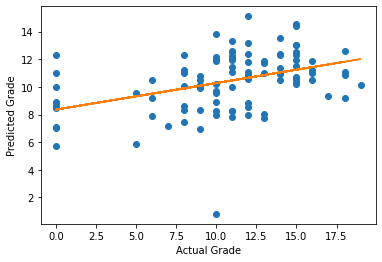

In [168]:
plt.plot(y_test, predictions, 'o') # plot the predicted values of G3 against the actual values of G3
m, b = np.polyfit(y_test,predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")

In [169]:
from sklearn.metrics import mean_absolute_error #calculate MAE
print(mean_absolute_error(y_test,predictions))

3.2353189767921005
